# MNIST Dataset (CNN Model)

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

## 1) Loading the Dataset

The dataset is a collection of images of hand-written digits (0-9).

- Number of Training Data Points = 60K
- Number of Testing Data Points = 10K
- Images Resolution = 28 x 28

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale the pixels from (0, 255) to (0, 1)
x_train = x_train / 255
x_test = x_test / 255

### Displaying a Sample Image

Training Data Points: (60000, 28, 28)
Testing Data Points: (10000, 28, 28)


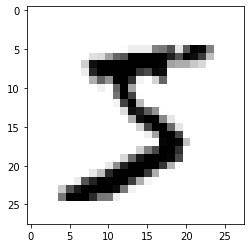

In [ ]:
print(f"Training Data Points: {x_train.shape}")
print(f"Testing Data Points: {x_test.shape}")

plt.imshow(x_train[0], cmap="binary")
plt.show()

## 2) Creating the Model

In [52]:
"""
    Model Architecture

    Layer       Output Shape        Hyperparameters

    Input       28x28x1             
    conv_1      26x26x10            10 (3x3) filters
    pool_1      13x13x10            
    flatten     1690                
    fc          128
    fc          10                    
"""

model = keras.Sequential()

# Input Layer
model.add(keras.Input(shape=(28, 28, 1)))

# Hidden Layers
model.add(layers.Conv2D(10, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation="relu"))

# Output Layer
model.add(layers.Dense(units=10, activation="softmax"))

In [53]:
# Model Compilation
model.compile(
    optimizer="Adam",
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               216448    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 217,838
Trainable params: 217,838
Non-trainable params: 0
_________________________________________________________________


## 3) Training

In [54]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=2, validation_data=(x_test, y_test))

Epoch 1/5
938/938 - 18s - loss: 0.2292 - accuracy: 0.9355 - val_loss: 0.0883 - val_accuracy: 0.9729
Epoch 2/5
938/938 - 18s - loss: 0.0759 - accuracy: 0.9779 - val_loss: 0.0556 - val_accuracy: 0.9819
Epoch 3/5
938/938 - 18s - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0495 - val_accuracy: 0.9836
Epoch 4/5
938/938 - 18s - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0510 - val_accuracy: 0.9833
Epoch 5/5
938/938 - 18s - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0411 - val_accuracy: 0.9860


## 4) Predicting

313/313 [==============================] - 2s 6ms/step


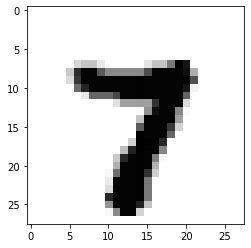

Prediction: 7


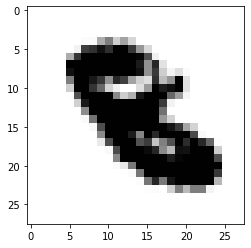

Prediction: 3


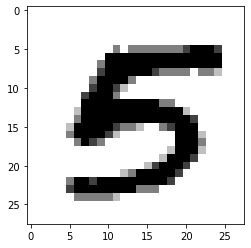

Prediction: 5


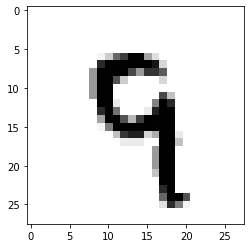

Prediction: 9


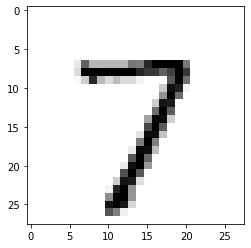

Prediction: 7


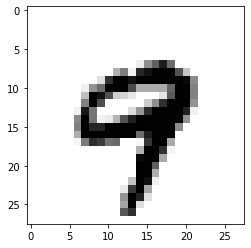

Prediction: 9


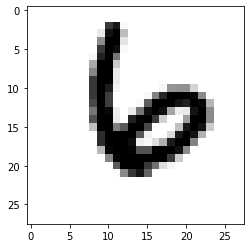

Prediction: 6


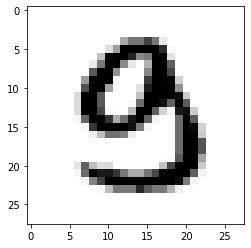

Prediction: 9


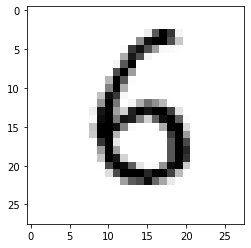

Prediction: 6


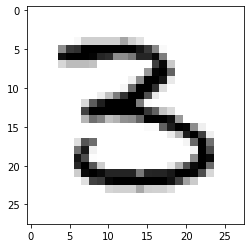

Prediction: 3


In [57]:
predictions = model.predict(x_test, verbose=1)

for i in range(1100, 1110):
    
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    plt.show()
    
    print(f"Prediction: {np.argmax(predictions[i])}")

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

model_save_name = "digit_recognition_model_CNN"
model_save_path = f"/content/gdrive/My Drive/{model_save_name}" 
model.save(model_save_path)

Mounted at /content/gdrive
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/digit_recognition_model_CNN/assets
